In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("DF_for_ML.csv")

In [3]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

In [ ]:
X = df[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]]
y = df[["median_house_value"]]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Linear Regression

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)
y_pred = lin_reg.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2_score = r2_score(y_test,y_pred)
print(f"Mean absolute Error : {mae}")
print(f"Prediction Accuracy: {r2_score}")

Mean absolute Error : 5.146770999327588
Prediction Accuracy: 0.6479959708743142


In [9]:
from sklearn.linear_model import RidgeCV
ridge_reg = RidgeCV()
ridge_reg.fit(X_train_scaled,y_train)
y_pred = ridge_reg.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2_score = r2_score(y_test,y_pred)
print(f"Mean absolute Error : {mae}")
print(f"Prediction Accuracy: {r2_score}")

Mean absolute Error : 5.146721187640247
Prediction Accuracy: 0.6479872824326229


In [10]:
from sklearn.linear_model import ElasticNetCV
ridge_reg = ElasticNetCV()
ridge_reg.fit(X_train_scaled,y_train)
y_pred = ridge_reg.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2_score = r2_score(y_test,y_pred)
print(f"Mean absolute Error : {mae}")
print(f"Prediction Accuracy: {r2_score}")

/home/monoitachi/Projects/California_House_price/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean absolute Error : 5.1498127150418584
Prediction Accuracy: 0.6459347578599139


In [11]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNet()
elasticcv.fit(X_train_scaled,y_train)
y_pred = elasticcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(f"Mean absolute Error : {mae}")
print(f"Prediction Accuracy: {score}")

TypeError: 'float' object is not callable

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly,y_train)
y_pred = lin_reg.predict(X_test_poly)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2_score = r2_score(y_test,y_pred)
print(f"Mean absolute Error : {mae}")
print(f"Prediction Accuracy: {r2_score}")

Mean absolute Error : 4.518514554047207
Prediction Accuracy: 0.7094135384326719


## Function to find the best model

In [ ]:
def Model_predict():
    from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
    from sklearn.linear_model import LinearRegression,Ridge,Lasso
    model_lst = [LinearRegression,Ridge,Lasso,ElasticNet]
    model_name = ["lin_reg","Ridge_reg","Lasso_reg","Elastic_reg"]
    Results = {}
    for i in range(len(model_lst)):
        model = model_lst[i]()
        model.fit(X_train_poly,y_train)
        y_pred = model.predict(X_test_poly)
        # Performance Metrics
        mse = mean_squared_error(y_test,y_pred)
        mae = mean_absolute_error(y_test,y_pred)
        rmse = np.sqrt(mse)
        n_score = r2_score(y_test,y_pred)
        Results[str(model_name[i])] = {"mse":float(mse),"mae":float(mae),"rmse":float(rmse),"r2_score":float(n_score)}

/home/monoitachi/Projects/California_House_price/venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.45069e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/monoitachi/Projects/California_House_price/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.160e+05, tolerance: 2.023e+02
  model = cd_fast.enet_coordinate_descent(
/home/monoitachi/Projects/California_House_price/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.138e+05, tolerance

In [15]:
for item in Results.items():
    print(item)

('lin_reg', {'mse': 39.90882512967446, 'mae': 4.518514554047207, 'rmse': 6.317343201827368, 'r2_score': 0.7094135384326719})
('Ridge_reg', {'mse': 40.05803427172589, 'mae': 4.553239059083254, 'rmse': 6.329141669430847, 'r2_score': 0.7083271081385869})
('Lasso_reg', {'mse': 42.23304772950703, 'mae': 4.744111572639451, 'rmse': 6.498695848361194, 'r2_score': 0.6924902734910043})
('Elastic_reg', {'mse': 42.10417702445055, 'mae': 4.737434369183733, 'rmse': 6.488773152488115, 'r2_score': 0.6934286143732621})


In [33]:
predict_model_result = {}
cross_valid_result = {}

def Model_predict():
    from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
    from sklearn.linear_model import LinearRegression,Ridge,Lasso
    model_lst = [LinearRegression,Ridge,Lasso,ElasticNet]
    model_name = ["lin_reg","Ridge_reg","Lasso_reg","Elastic_reg"]
    Results = {}
    for i in range(len(model_lst)):
        model = model_lst[i]()
        model.fit(X_train_poly,y_train)
        y_pred = model.predict(X_test_poly)
        # Performance Metrics
        mse = mean_squared_error(y_test,y_pred)
        mae = mean_absolute_error(y_test,y_pred)
        rmse = np.sqrt(mse)
        n_score = r2_score(y_test,y_pred)
        predict_model_result[str(model_name[i])] = {"mse":float(mse),"mae":float(mae),"rmse":float(rmse),"r2_score":float(n_score)}


def Cross_Valid():
    from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
    from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV
    cv_model_lst = [RidgeCV,LassoCV,ElasticNetCV]
    cv_model_name = ["Ridge_CV","Lasso_CV","Elastic_CV"]
    #Results = {}
    for i in range(len(cv_model_lst)):
        model = cv_model_lst[i]()
        model.fit(X_train_poly,y_train)
        y_pred = model.predict(X_test_poly)
        # Performance Metrics
        mse = mean_squared_error(y_test,y_pred)
        mae = mean_absolute_error(y_test,y_pred)
        rmse = np.sqrt(mse)
        n_score = r2_score(y_test,y_pred)
        cross_valid_result[str(cv_model_name[i])] = {"mse":float(mse),"mae":float(mae),"rmse":float(rmse),"r2_score":float(n_score)}

Model_predict()
Cross_Valid()

print("-----MODEL DETAILS: ------")
for item in predict_model_result.items():
    print(item)
print("\n\n-----CV DETAILS: ------")
for item in predict_model_result.items():
    print(item)

/home/monoitachi/Projects/California_House_price/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monoitachi/Projects/California_House_price/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-----MODEL DETAILS: ------
('lin_reg', {'mse': 39.90882528202718, 'mae': 4.518514563467736, 'rmse': 6.317343213885659, 'r2_score': 0.7094135373233524})
('Ridge_reg', {'mse': 39.89891970890228, 'mae': 4.51842340049051, 'rmse': 6.316559166896347, 'r2_score': 0.7094856623592263})
('Lasso_reg', {'mse': 67.92244534820684, 'mae': 6.241999548698647, 'rmse': 8.241507468188502, 'r2_score': 0.505439135564534})
('Elastic_reg', {'mse': 75.18384435550439, 'mae': 6.66521721972357, 'rmse': 8.670861800046428, 'r2_score': 0.45256701425545165})


-----CV DETAILS: ------
('lin_reg', {'mse': 39.90882528202718, 'mae': 4.518514563467736, 'rmse': 6.317343213885659, 'r2_score': 0.7094135373233524})
('Ridge_reg', {'mse': 39.89891970890228, 'mae': 4.51842340049051, 'rmse': 6.316559166896347, 'r2_score': 0.7094856623592263})
('Lasso_reg', {'mse': 67.92244534820684, 'mae': 6.241999548698647, 'rmse': 8.241507468188502, 'r2_score': 0.505439135564534})
('Elastic_reg', {'mse': 75.18384435550439, 'mae': 6.665217219723

In [31]:
for item in predict_model_result.items():
    print(item)

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [ ]:
predict_model_result = {}
cross_valid_result = {}

def Model_predict():
    from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
    from sklearn.linear_model import LinearRegression,Ridge,Lasso
    model_lst = [LinearRegression,Ridge,Lasso,ElasticNet]
    model_name = ["lin_reg","Ridge_reg","Lasso_reg","Elastic_reg"]
    Results = {}
    for i in range(len(model_lst)):
        model = model_lst[i]()
        model.fit(X_train_poly,y_train)
        y_pred_train = model.predict(X_train_poly)
        y_pred_test = model.predict(X_test_poly)
        # Performance Metrics for testing data
        mse = mean_squared_error(y_test,y_pred_test)
        mae = mean_absolute_error(y_test,y_pred_test)
        rmse = np.sqrt(mse)
        n_score = r2_score(y_test,y_pred_test)
        predict_model_result[str(model_name[i])+"TESTING"] = {"mse":float(mse),"mae":float(mae),"rmse":float(rmse),"r2_score":float(n_score)}

        # Performance Metrics for training data
        mse = mean_squared_error(y_train,y_pred_train)
        mae = mean_absolute_error(y_train,y_pred_train)
        rmse = np.sqrt(mse)
        n_score = r2_score(y_train,y_pred_train)
        predict_model_result[str(model_name[i])+"TRAINING"] = {"mse":float(mse),"mae":float(mae),"rmse":float(rmse),"r2_score":float(n_score)}




def Cross_Valid():
    from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
    from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV
    cv_model_lst = [RidgeCV,LassoCV,ElasticNetCV]
    cv_model_name = ["Ridge_CV","Lasso_CV","Elastic_CV"]
    #Results = {}
    for i in range(len(cv_model_lst)):
        model = cv_model_lst[i]()
        model.fit(X_train_poly,y_train)
        y_pred = model.predict(X_test_poly)
        # Performance Metrics
        mse = mean_squared_error(y_test,y_pred)
        mae = mean_absolute_error(y_test,y_pred)
        rmse = np.sqrt(mse)
        n_score = r2_score(y_test,y_pred)
        cross_valid_result[str(cv_model_name[i])] = {"mse":float(mse),"mae":float(mae),"rmse":float(rmse),"r2_score":float(n_score)}

Model_predict()
Cross_Valid()

print("-----MODEL DETAILS: ------")
for item in predict_model_result.items():
    print(item)
print("\n\n-----CV DETAILS: ------")
for item in predict_model_result.items():
    print(item)

/home/monoitachi/Projects/California_House_price/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.326e+05, tolerance: 2.023e+02
  model = cd_fast.enet_coordinate_descent(
/home/monoitachi/Projects/California_House_price/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.239e+05, tolerance: 2.023e+02
  model = cd_fast.enet_coordinate_descent(
/home/monoitachi/Projects/California_House_price/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

-----MODEL DETAILS: ------
('lin_reg', {'mse': 13603.064581636803, 'mae': 6.081626989866427, 'rmse': 116.63217644216712, 'r2_score': -98.04742598675264})
('Ridge_reg', {'mse': 5907.385504870324, 'mae': 5.217960686102696, 'rmse': 76.85951798489452, 'r2_score': -42.01319934617664})
('Lasso_reg', {'mse': 63.09514332499883, 'mae': 5.876901939606572, 'rmse': 7.943245138166065, 'r2_score': 0.5405879681669199})
('Elastic_reg', {'mse': 63.153332563879864, 'mae': 5.910689910586818, 'rmse': 7.946907106785624, 'r2_score': 0.5401642772922125})


-----CV DETAILS: ------
('lin_reg', {'mse': 13603.064581636803, 'mae': 6.081626989866427, 'rmse': 116.63217644216712, 'r2_score': -98.04742598675264})
('Ridge_reg', {'mse': 5907.385504870324, 'mae': 5.217960686102696, 'rmse': 76.85951798489452, 'r2_score': -42.01319934617664})
('Lasso_reg', {'mse': 63.09514332499883, 'mae': 5.876901939606572, 'rmse': 7.943245138166065, 'r2_score': 0.5405879681669199})
('Elastic_reg', {'mse': 63.153332563879864, 'mae': 5.91

/home/monoitachi/Projects/California_House_price/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.283e+04, tolerance: 2.023e+02
  model = cd_fast.enet_coordinate_descent(


In [15]:
predict_model_result = {}

def Model_predict():
    from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
    from sklearn.linear_model import LinearRegression,Ridge,Lasso
    model_lst = [LinearRegression,Ridge,Lasso,ElasticNet]
    model_name = ["lin_reg","Ridge_reg","Lasso_reg","Elastic_reg"]
    Results = {}
    for i in range(len(model_lst)):
        model = model_lst[i]()
        model.fit(X_train_poly,y_train)
        y_pred = model.predict(X_test_poly)
        # Performance Metrics
        mse = mean_squared_error(y_test,y_pred)
        mae = mean_absolute_error(y_test,y_pred)
        rmse = np.sqrt(mse)
        n_score = r2_score(y_test,y_pred)
        predict_model_result[str(model_name[i])] = {"mse":float(mse),"mae":float(mae),"rmse":float(rmse),"r2_score":float(n_score)}

Model_predict()

print("-----MODEL DETAILS: ------")
for item in predict_model_result.items():
    print(item)

-----MODEL DETAILS: ------
('lin_reg', {'mse': 35.748362089803095, 'mae': 4.246352036864197, 'rmse': 5.978993401050305, 'r2_score': 0.7397069441971762})
('Ridge_reg', {'mse': 35.767333392893136, 'mae': 4.24666426945682, 'rmse': 5.980579687028101, 'r2_score': 0.7395688092403503})
('Lasso_reg', {'mse': 62.71159735847501, 'mae': 5.948014699497038, 'rmse': 7.919065434663046, 'r2_score': 0.543380665393622})
('Elastic_reg', {'mse': 67.33896658977216, 'mae': 6.156939631071717, 'rmse': 8.20603232931556, 'r2_score': 0.5096875950784965})


# Final Function with 73-74% accuracy in testing as well as training before Accuracy Optimization

In [72]:
def main(df):
    from sklearn.preprocessing import PolynomialFeatures


    X = df[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]]
    y = df[["median_house_value"]]
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=42)

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    poly = PolynomialFeatures(degree=3)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)


    predict_model_result = {}

    def Model_predict():
        from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
        from sklearn.linear_model import LinearRegression,Ridge,Lasso
        model_lst = [LinearRegression,Ridge,Lasso,ElasticNet]
        model_name = ["lin_reg","Ridge_reg","Lasso_reg","Elastic_reg"]
        Results = {}
        for i in range(len(model_lst)):
            model = model_lst[i]()
            model.fit(X_train_poly,y_train)
            y_pred_train = model.predict(X_train_poly)
            y_pred_test = model.predict(X_test_poly)
            # Performance Metrics for testing data
            mse = mean_squared_error(y_test,y_pred_test)
            mae = mean_absolute_error(y_test,y_pred_test)
            rmse = np.sqrt(mse)
            n_score = r2_score(y_test,y_pred_test)
            predict_model_result[str(model_name[i])+"TESTING"] = {"mse":float(mse),"mae":float(mae),"rmse":float(rmse),"r2_score":float(n_score)}

            # Performance Metrics for training data
            mse = mean_squared_error(y_train,y_pred_train)
            mae = mean_absolute_error(y_train,y_pred_train)
            rmse = np.sqrt(mse)
            n_score = r2_score(y_train,y_pred_train)
            predict_model_result[str(model_name[i])+"TRAINING"] = {"mse":float(mse),"mae":float(mae),"rmse":float(rmse),"r2_score":float(n_score)}

    Model_predict()

    print("-----MODEL DETAILS: ------")
    for item in predict_model_result.items():
        print(item)

In [31]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129,322,126,8.3252,45.26
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,35.85
2,-122.24,37.85,52,1467,190,496,177,7.2574,35.21
3,-122.25,37.85,52,1274,235,558,219,5.6431,34.13
4,-122.25,37.85,52,1627,280,565,259,3.8462,34.22


<Axes: >

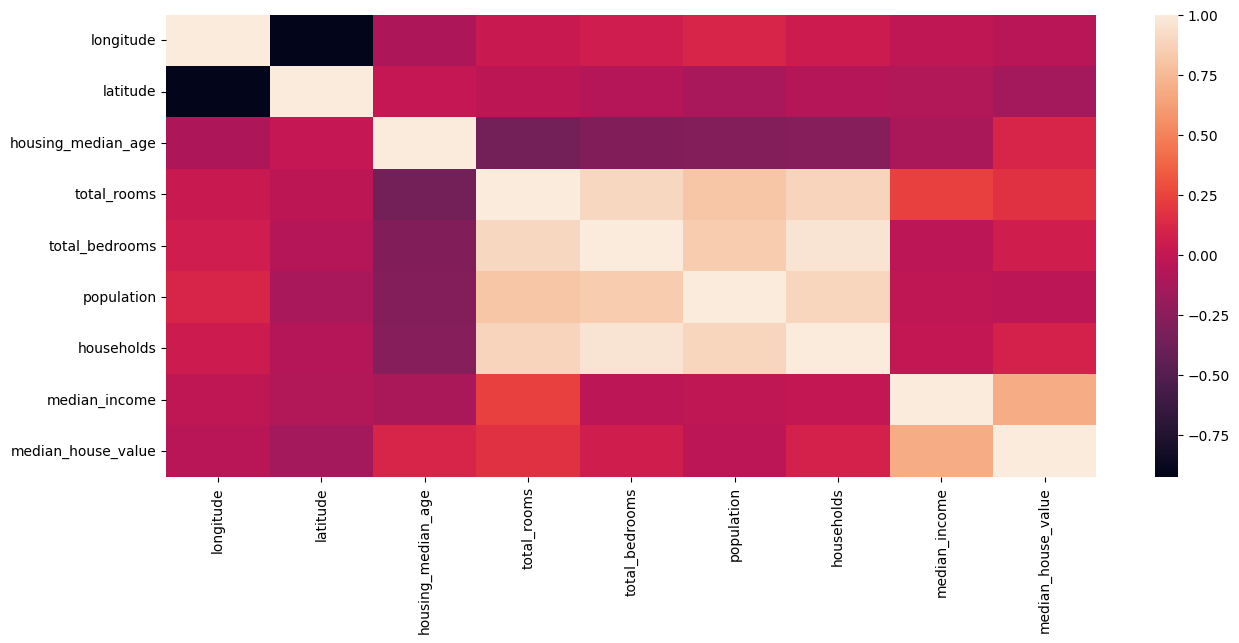

In [32]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr())

In [52]:
df_copy = df.copy()

In [48]:

df_copy.skew()

longitude            -0.291306
latitude              0.459146
housing_median_age    0.054117
total_rooms           2.010251
total_bedrooms        1.936505
population            1.338558
households            1.617033
median_income         1.659229
median_house_value    0.974804
dtype: float64

In [49]:
lst = ["total_rooms","total_bedrooms","population","households","median_income"]

In [53]:
for col in lst:
    df_copy[col] = np.log(df_copy[col]+1)

In [54]:

df_copy.skew()

longitude            -0.291306
latitude              0.459146
housing_median_age    0.054117
total_rooms          -1.369575
total_bedrooms       -1.279107
population           -1.371833
households           -1.330222
median_income         0.232245
median_house_value    0.974804
dtype: float64

<Axes: >

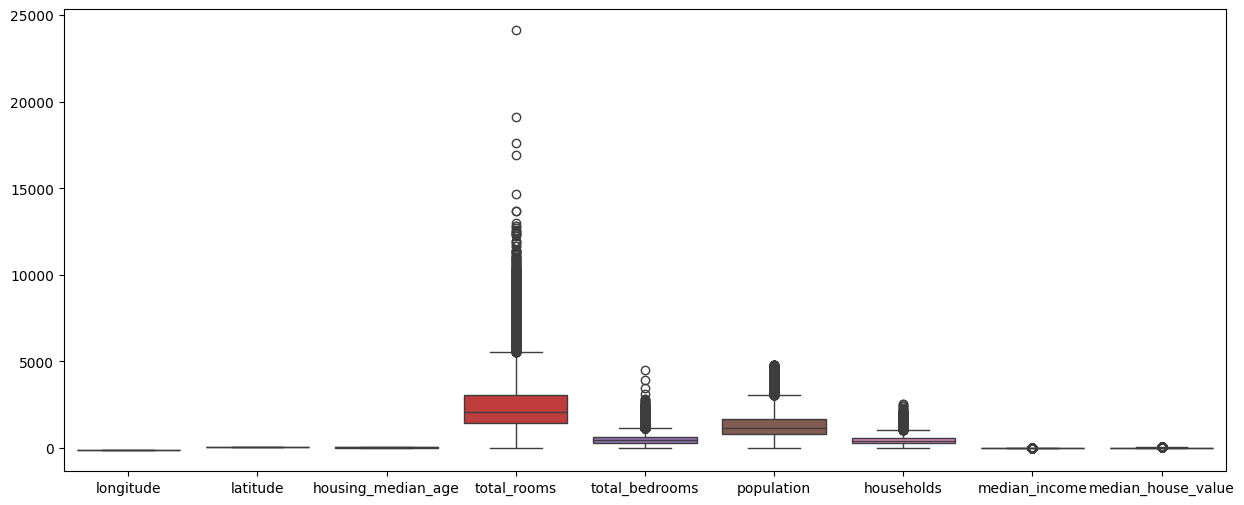

In [56]:
plt.figure(figsize=(15,6))
sns.boxplot(df)

<Axes: xlabel='total_rooms', ylabel='Count'>

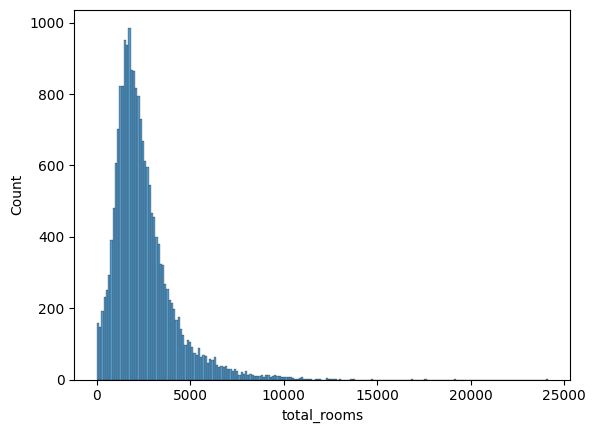

In [58]:
sns.histplot(df["total_rooms"])

<Axes: xlabel='total_bedrooms', ylabel='Count'>

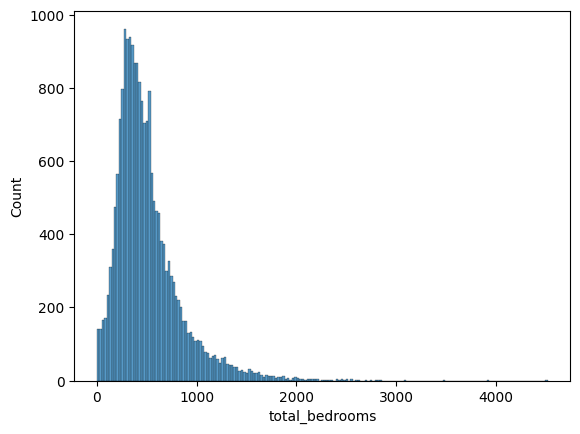

In [59]:
sns.histplot(df["total_bedrooms"])

In [62]:
# Remove outliers based on Z-score for 'total_rooms' and 'total_bedrooms'
from scipy.stats import zscore
zscore_rooms = zscore(df["total_rooms"])
zscore_bedrooms = zscore(df["total_bedrooms"])
df_cleaned = df[(abs(zscore_rooms) <= 3) & (abs(zscore_bedrooms) <= 3)]


In [63]:
df_cleaned

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129,322,126,8.3252,45.26
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,35.85
2,-122.24,37.85,52,1467,190,496,177,7.2574,35.21
3,-122.25,37.85,52,1274,235,558,219,5.6431,34.13
4,-122.25,37.85,52,1627,280,565,259,3.8462,34.22
...,...,...,...,...,...,...,...,...,...
20293,-121.09,39.48,25,1665,374,845,330,1.5603,7.81
20294,-121.21,39.49,18,697,150,356,114,2.5568,7.71
20295,-121.22,39.43,17,2254,485,1007,433,1.7000,9.23
20296,-121.32,39.43,18,1860,409,741,349,1.8672,8.47


<Axes: >

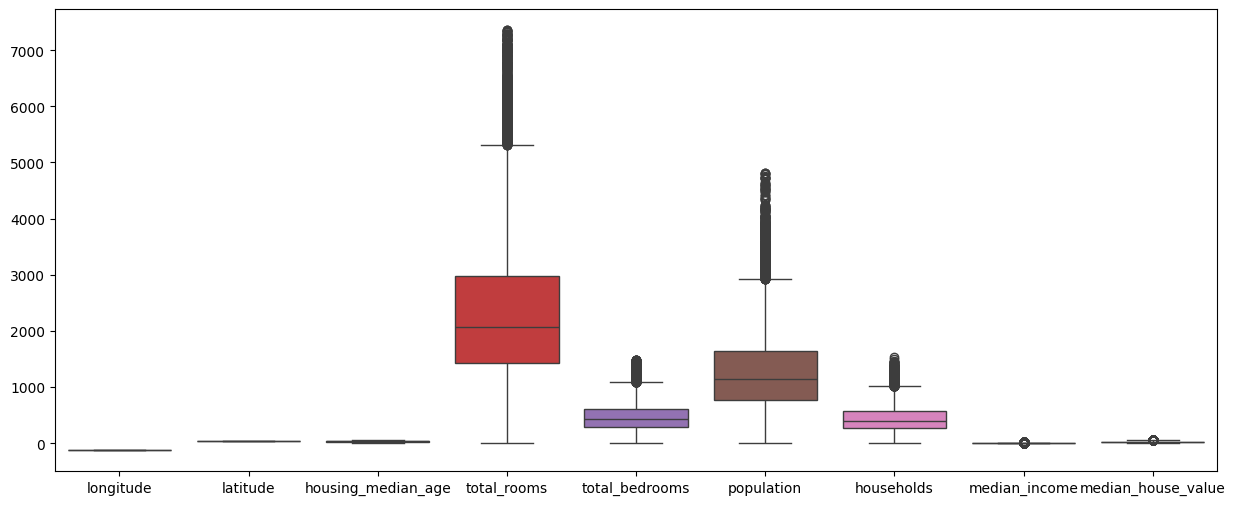

In [64]:
plt.figure(figsize=(15,6))
sns.boxplot(df_cleaned)

In [66]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'total_rooms' and 'total_bedrooms'
Q1_rooms = df['total_rooms'].quantile(0.25)
Q3_rooms = df['total_rooms'].quantile(0.75)
Q1_bedrooms = df['total_bedrooms'].quantile(0.25)
Q3_bedrooms = df['total_bedrooms'].quantile(0.75)

# Calculate IQR for both columns
IQR_rooms = Q3_rooms - Q1_rooms
IQR_bedrooms = Q3_bedrooms - Q1_bedrooms

# Define outlier conditions for both columns
lower_bound_rooms = Q1_rooms - 1.5 * IQR_rooms
upper_bound_rooms = Q3_rooms + 1.5 * IQR_rooms
lower_bound_bedrooms = Q1_bedrooms - 1.5 * IQR_bedrooms
upper_bound_bedrooms = Q3_bedrooms + 1.5 * IQR_bedrooms

# Identify outliers in both columns
outliers_rooms = df[(df['total_rooms'] < lower_bound_rooms) | (df['total_rooms'] > upper_bound_rooms)]
outliers_bedrooms = df[(df['total_bedrooms'] < lower_bound_bedrooms) | (df['total_bedrooms'] > upper_bound_bedrooms)]

# Display outliers
print("Outliers in Total Rooms:")
print(outliers_rooms)
print("\nOutliers in Total Bedrooms:")
print(outliers_bedrooms)


Outliers in Total Rooms:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1        -122.22     37.86                  21         7099            1106   
101      -122.25     37.81                  28         5806            1603   
104      -122.26     37.81                  34         5871            1914   
185      -122.23     37.79                  43         5963            1344   
507      -122.30     37.84                  14         7355            2408   
...          ...       ...                 ...          ...             ...   
20194    -121.67     38.54                  13         6141            1019   
20200    -121.71     38.56                  20         8627            1516   
20202    -121.70     38.54                  13         6819            1158   
20204    -121.74     38.55                  33         6861            1820   
20226    -121.79     38.66                  15         6809            1052   

       population  househo

In [67]:
# Remove outliers using IQR method for 'total_rooms' and 'total_bedrooms'
df_cleaned = df[
    (df['total_rooms'] >= lower_bound_rooms) & (df['total_rooms'] <= upper_bound_rooms) & 
    (df['total_bedrooms'] >= lower_bound_bedrooms) & (df['total_bedrooms'] <= upper_bound_bedrooms)
]


<Axes: >

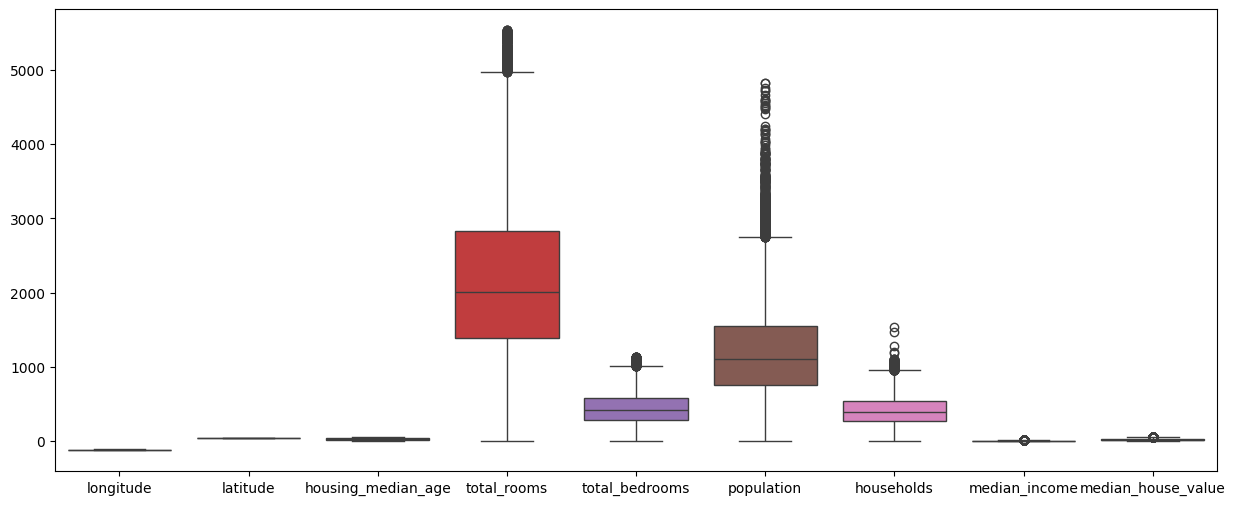

In [68]:
plt.figure(figsize=(15,6))
sns.boxplot(df_cleaned)

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(df_cleaned)

In [73]:
main(df_cleaned)

-----MODEL DETAILS: ------
('lin_regTESTING', {'mse': 34.02630973861589, 'mae': 4.11763163368357, 'rmse': 5.833207500047971, 'r2_score': 0.7531098250455314})
('lin_regTRAINING', {'mse': 33.34840592307532, 'mae': 4.107479982344717, 'rmse': 5.774807868931686, 'r2_score': 0.7457507337089591})
('Ridge_regTESTING', {'mse': 34.01838833642074, 'mae': 4.118028277732225, 'rmse': 5.8325284685478165, 'r2_score': 0.7531673016390518})
('Ridge_regTRAINING', {'mse': 33.35261405965621, 'mae': 4.107476725587543, 'rmse': 5.775172210389592, 'r2_score': 0.7457186507470144})
('Lasso_regTESTING', {'mse': 60.99295531272258, 'mae': 5.859128966832941, 'rmse': 7.8097986729955196, 'r2_score': 0.5574435922136318})
('Lasso_regTRAINING', {'mse': 59.81839417906225, 'mae': 5.77172915185374, 'rmse': 7.73423520324164, 'r2_score': 0.5439427340000326})
('Elastic_regTESTING', {'mse': 65.89465749431004, 'mae': 6.077710856666125, 'rmse': 8.11755243249528, 'r2_score': 0.5218775223552419})
('Elastic_regTRAINING', {'mse': 64.0

In [74]:
Q1_population = df["population"].quantile(0.25)
Q3_population = df["population"].quantile(0.75)

Q1_households = df["households"].quantile(0.25)
Q3_households = df["households"].quantile(0.75)

IQR_pop = Q3_population-Q1_households
IQR_households = Q3_households-Q1_households

lower_fence_pop = Q1_population-1.5*(IQR_pop)
upper_fence_pop = Q3_population+1.5*(IQR_pop)

lower_fence_households = Q1_households-1.5*(IQR_households)
upper_fence_households = Q3_households+1.5*(IQR_households)


In [78]:
new_cleaned_Df = df_cleaned[
    (df_cleaned["population"]>=lower_fence_pop )& (df_cleaned["population"]<=upper_fence_pop) &
    (df_cleaned["households"]>=lower_fence_households) & (df_cleaned["households"]<=upper_fence_households)
]

In [86]:
df_copy = new_cleaned_Df.copy()
df_copy.to_csv("Final_csv.csv",index=False)

In [97]:
list([df_copy.iloc[1]])

[longitude             -122.2400
 latitude                37.8500
 housing_median_age      52.0000
 total_rooms           1467.0000
 total_bedrooms         190.0000
 population             496.0000
 households             177.0000
 median_income            7.2574
 median_house_value      35.2100
 Name: 2, dtype: float64]

In [ ]:
def main(df,test_df):
    from sklearn.preprocessing import PolynomialFeatures


    X = df[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]]
    y = df[["median_house_value"]]
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=42)

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)


    predict_model_result = {}

    def Model_predict():
        from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
        from sklearn.linear_model import LinearRegression,Ridge,Lasso
        model_lst = [LinearRegression,Ridge,Lasso,ElasticNet]
        model_name = ["lin_reg","Ridge_reg","Lasso_reg","Elastic_reg"]
        Results = {}
        for i in range(len(model_lst)):
            model = model_lst[i]()
            model.fit(X_train_poly,y_train)
            y_pred_train = model.predict(X_train_poly)
            y_pred_test = model.predict(X_test_poly)
            # Performance Metrics for testing data
            mse = mean_squared_error(y_test,y_pred_test)
            mae = mean_absolute_error(y_test,y_pred_test)
            rmse = np.sqrt(mse)
            n_score = r2_score(y_test,y_pred_test)
            predict_model_result[str(model_name[i])+"TESTING"] = {"mse":float(mse),"mae":float(mae),"rmse":float(rmse),"r2_score":float(n_score)}

            # Performance Metrics for training data
            mse = mean_squared_error(y_train,y_pred_train)
            mae = mean_absolute_error(y_train,y_pred_train)
            rmse = np.sqrt(mse)
            n_score = r2_score(y_train,y_pred_train)
            predict_model_result[str(model_name[i])+"TRAINING"] = {"mse":float(mse),"mae":float(mae),"rmse":float(rmse),"r2_score":float(n_score)}
            # Checking for random data
            new_pred = model.predict(poly.transform(scaler.transform(test_df)))
            print(new_pred)

    Model_predict()

    print("-----MODEL DETAILS: ------")
    for item in predict_model_result.items():
        print(item)

In [137]:
li = pd.DataFrame([{
    'longitude': -122.23,
    'latitude': 41.88,
    'housing_median_age': 76,
    'total_rooms': 122,
    'total_bedrooms': 252,
    'population': 1000,
    'households': 233,
    'median_income': 16.3252,
}])

In [138]:
main(df_copy,li)

ValueError: X has 8 features, but LinearRegression is expecting 45 features as input.

In [ ]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
8280,-118.35,33.97,30,7.345365,5.802118,6.630683,5.857933,1.569782
14925,-117.09,32.91,9,7.607381,5.758902,6.688355,5.669881,2.024272
19247,-120.94,37.60,30,8.088869,6.354370,7.498316,6.378426,1.511406
753,-122.04,37.66,23,7.791523,5.855072,6.972606,5.953243,1.994714
1418,-122.01,37.98,29,7.601902,5.924256,6.863803,5.916202,1.670909


In [126]:
df_copy.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,18842.000000,18842.000000,18842.000000,18842.000000,18842.000000,18842.000000,18842.000000,18842.000000,18842.000000
mean,-119.603765,35.663457,29.705658,2160.921452,444.183314,1194.483441,415.136557,3.830248,20.460524
std,2.001485,2.147726,12.308236,1087.777794,219.474927,624.985534,205.011677,1.890399,11.538565
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,1.499900
25%,-121.810000,33.940000,19.000000,1388.000000,286.000000,755.000000,269.000000,2.537250,11.700000
50%,-118.530000,34.270000,30.000000,2002.000000,412.000000,1097.500000,386.000000,3.505200,17.725000
75%,-118.030000,37.730000,38.000000,2813.750000,574.000000,1545.000000,540.000000,4.692300,26.180000
max,-114.490000,41.950000,52.000000,5536.000000,1131.000000,3795.000000,1059.000000,15.000100,50.000100


In [140]:
def main(df,test_df):
    from sklearn.preprocessing import PolynomialFeatures


    X = df[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]]
    y = df[["median_house_value"]]
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=42)

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    #poly = PolynomialFeatures(degree=2)
    #X_train_poly = poly.fit_transform(X_train_scaled)
    #X_test_poly = poly.transform(X_test_scaled)


    predict_model_result = {}

    def Model_predict():
        from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
        from sklearn.linear_model import LinearRegression,Ridge,Lasso
        model_lst = [LinearRegression,Ridge,Lasso,ElasticNet]
        model_name = ["lin_reg","Ridge_reg","Lasso_reg","Elastic_reg"]
        Results = {}
        for i in range(len(model_lst)):
            model = model_lst[i]()
            model.fit(X_train_scaled,y_train)
            y_pred_train = model.predict(X_train_scaled)
            y_pred_test = model.predict(X_test_scaled)
            # Performance Metrics for testing data
            mse = mean_squared_error(y_test,y_pred_test)
            mae = mean_absolute_error(y_test,y_pred_test)
            rmse = np.sqrt(mse)
            n_score = r2_score(y_test,y_pred_test)
            predict_model_result[str(model_name[i])+"TESTING"] = {"mse":float(mse),"mae":float(mae),"rmse":float(rmse),"r2_score":float(n_score)}

            # Performance Metrics for training data
            mse = mean_squared_error(y_train,y_pred_train)
            mae = mean_absolute_error(y_train,y_pred_train)
            rmse = np.sqrt(mse)
            n_score = r2_score(y_train,y_pred_train)
            predict_model_result[str(model_name[i])+"TRAINING"] = {"mse":float(mse),"mae":float(mae),"rmse":float(rmse),"r2_score":float(n_score)}
            # Checking for random data
            new_pred = model.predict(scaler.transform(test_df))
            print(new_pred)

    Model_predict()

    print("-----MODEL DETAILS: ------")
    for item in predict_model_result.items():
        print(item)

main(df_copy,li)

[[60.20285364]]
[[60.22100373]]
[70.91372686]
[53.92430284]
-----MODEL DETAILS: ------
('lin_regTESTING', {'mse': 45.06389216455565, 'mae': 4.9494195396535225, 'rmse': 6.712964484082695, 'r2_score': 0.6643908304354399})
('lin_regTRAINING', {'mse': 47.00573976122727, 'mae': 5.024424457574998, 'rmse': 6.856073202732543, 'r2_score': 0.6458947742700183})
('Ridge_regTESTING', {'mse': 45.06364571653123, 'mae': 4.949355121234649, 'rmse': 6.7129461279330425, 'r2_score': 0.6643926658343112})
('Ridge_regTRAINING', {'mse': 47.00575206152309, 'mae': 5.024350801366383, 'rmse': 6.856074099768985, 'r2_score': 0.6458946816090145})
('Lasso_regTESTING', {'mse': 65.67641026037762, 'mae': 6.176048857618695, 'rmse': 8.104098361963386, 'r2_score': 0.5108810080811618})
('Lasso_regTRAINING', {'mse': 66.76173802495721, 'mae': 6.15090222266847, 'rmse': 8.170785643067452, 'r2_score': 0.4970682211674624})
('Elastic_regTESTING', {'mse': 71.81095184264358, 'mae': 6.5938727695606225, 'rmse': 8.47413428278332, 'r2_sc

In [ ]:
def main(df,test_df):
    from sklearn.preprocessing import PolynomialFeatures


    X = df[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]]
    y = df[["median_house_value"]]
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=42)

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    #poly = PolynomialFeatures(degree=2)
    #X_train_poly = poly.fit_transform(X_train_scaled)
    #X_test_poly = poly.transform(X_test_scaled)


    predict_model_result = {}

    def Model_predict():
        from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
        from sklearn.linear_model import LinearRegression,Ridge,Lasso
        model_lst = [LinearRegression,Ridge,Lasso,ElasticNet]
        model_name = ["lin_reg","Ridge_reg","Lasso_reg","Elastic_reg"]
        Results = {}
        for i in range(len(model_lst)):
            model = model_lst[i]()
            model.fit(X_train_scaled,y_train)
            y_pred_train = model.predict(X_train_scaled)
            y_pred_test = model.predict(X_test_scaled)
            # Performance Metrics for testing data
            mse = mean_squared_error(y_test,y_pred_test)
            mae = mean_absolute_error(y_test,y_pred_test)
            rmse = np.sqrt(mse)
            n_score = r2_score(y_test,y_pred_test)
            predict_model_result[str(model_name[i])+"TESTING"] = {"mse":float(mse),"mae":float(mae),"rmse":float(rmse),"r2_score":float(n_score)}

            # Performance Metrics for training data
            mse = mean_squared_error(y_train,y_pred_train)
            mae = mean_absolute_error(y_train,y_pred_train)
            rmse = np.sqrt(mse)
            n_score = r2_score(y_train,y_pred_train)
            predict_model_result[str(model_name[i])+"TRAINING"] = {"mse":float(mse),"mae":float(mae),"rmse":float(rmse),"r2_score":float(n_score)}
            # Checking for random data
            new_pred = model.predict(scaler.transform(test_df))
            print(new_pred)

    Model_predict()

    print("-----MODEL DETAILS: ------")
    for item in predict_model_result.items():
        print(item)

main(df_copy,li)

In [160]:
def main(df,test_df):
    from sklearn.preprocessing import PolynomialFeatures


    X = df[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]]
    y = df["median_house_value"]
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=42)

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    #poly = PolynomialFeatures(degree=2)
    #X_train_poly = poly.fit_transform(X_train_scaled)
    #X_test_poly = poly.transform(X_test_scaled)
    VALUES = []
    predict_model_result = {}
    cross_valid_result = {}

    def Model_predict():
        from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
        from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
        from sklearn.linear_model import RidgeCV,LassoCV,ElasticNetCV
        model_lst = [LinearRegression,Ridge,Lasso,ElasticNet]
        model_name = ["lin_reg","Ridge_reg","Lasso_reg","Elastic_reg"]

        cv_model_lst = [RidgeCV,LassoCV,ElasticNetCV]
        cv_model_name = ["Ridge_CV","Lasso_CV","Elastic_CV"]
        print("----------------------------------------------------")
        print("-----BEFORE CV values: ------")
        Results = {}
        for i in range(len(model_lst)):
            model = model_lst[i]()
            model.fit(X_train_scaled,y_train)
            y_pred_train = model.predict(X_train_scaled)
            y_pred_test = model.predict(X_test_scaled)
            # Performance Metrics for testing data
            mse = mean_squared_error(y_test,y_pred_test)
            mae = mean_absolute_error(y_test,y_pred_test)
            rmse = np.sqrt(mse)
            n_score = r2_score(y_test,y_pred_test)
            predict_model_result[str(model_name[i])+"TESTING"] = {"mse":float(mse),"mae":float(mae),"rmse":float(rmse),"r2_score":float(n_score)}

            # Performance Metrics for training data
            mse = mean_squared_error(y_train,y_pred_train)
            mae = mean_absolute_error(y_train,y_pred_train)
            rmse = np.sqrt(mse)
            n_score = r2_score(y_train,y_pred_train)
            predict_model_result[str(model_name[i])+"TRAINING"] = {"mse":float(mse),"mae":float(mae),"rmse":float(rmse),"r2_score":float(n_score)}
            # Checking for random data
            new_pred = model.predict(scaler.transform(test_df))
            print(new_pred)
            VALUES.append(float(new_pred[0]))
        print("----------------------------------------------------")
        print("-----AFTER CV values: ------")
        for i in range(len(cv_model_lst)):
            model = cv_model_lst[i]()
            model.fit(X_train_scaled,y_train)
            y_pred = model.predict(X_test_scaled)
            # Performance Metrics
            mse = mean_squared_error(y_test,y_pred)
            mae = mean_absolute_error(y_test,y_pred)
            rmse = np.sqrt(mse)
            n_score = r2_score(y_test,y_pred)
            cross_valid_result[str(cv_model_name[i])] = {"mse":float(mse),"mae":float(mae),"rmse":float(rmse),"r2_score":float(n_score)}
            new_pred = model.predict(scaler.transform(test_df))
            print(new_pred)
            VALUES.append(float(new_pred[0]))
            

    Model_predict()


    print("-----MODEL DETAILS: ------")
    for item in predict_model_result.items():
        print(item)

    print("-----CV DETAILS: ------")
    for item in cross_valid_result.items():
                print(item)
    print("The predicted value list: ",VALUES)
    print(f"The average predicted values is: { np.average(VALUES)}")
    final_value = np.average(VALUES)
main(df_copy,li)

----------------------------------------------------
-----BEFORE CV values: ------
[60.20285364]
[60.22100373]
[70.91372686]
[53.92430284]
----------------------------------------------------
-----AFTER CV values: ------
[60.22100373]
[60.08452515]
[61.75588504]
-----MODEL DETAILS: ------
('lin_regTESTING', {'mse': 45.06389216455565, 'mae': 4.9494195396535225, 'rmse': 6.712964484082695, 'r2_score': 0.6643908304354399})
('lin_regTRAINING', {'mse': 47.00573976122727, 'mae': 5.024424457574998, 'rmse': 6.856073202732543, 'r2_score': 0.6458947742700183})
('Ridge_regTESTING', {'mse': 45.06364571653123, 'mae': 4.949355121234649, 'rmse': 6.7129461279330425, 'r2_score': 0.6643926658343112})
('Ridge_regTRAINING', {'mse': 47.00575206152309, 'mae': 5.024350801366383, 'rmse': 6.856074099768985, 'r2_score': 0.6458946816090145})
('Lasso_regTESTING', {'mse': 65.67641026037762, 'mae': 6.176048857618695, 'rmse': 8.104098361963386, 'r2_score': 0.5108810080811618})
('Lasso_regTRAINING', {'mse': 66.7617380

In [4]:
import pandas as pd
df  = pd.read_csv("Final_csv.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18842 entries, 0 to 18841
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18842 non-null  float64
 1   latitude            18842 non-null  float64
 2   housing_median_age  18842 non-null  int64  
 3   total_rooms         18842 non-null  int64  
 4   total_bedrooms      18842 non-null  int64  
 5   population          18842 non-null  int64  
 6   households          18842 non-null  int64  
 7   median_income       18842 non-null  float64
 8   median_house_value  18842 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 1.3 MB


In [163]:
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
scaler=StandardScaler()
model = ElasticNetCV()

X = df[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]]
y = df["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled,y_train)
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)
# Performance Metrics for testing data
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
n_score = r2_score(y_test,y_pred_test)

print(f"mse: {mse}")
print(f"mae: {mae}")
print(f"rmse: {rmse}")
print(f"r2 score: {n_score}")

mse: 48.62693105814424
mae: 5.1498127150418584
rmse: 6.9733013026933115
r2 score: 0.6459347578599139


In [164]:
scaler

StandardScaler()

In [ ]:
import pickle
pickle.dump(scaler,open("scaler.pkl"),"wb")


FileNotFoundError: [Errno 2] No such file or directory: 'scaler.pkl'

In [169]:
import pickle

with open("models/pickle.pkl","wb") as file:
    pickle.dump(scaler,file)

In [171]:
import pickle

with open("models/scaler.pkl","wb") as file:
    pickle.dump(scaler,file)
import pickle

with open("models/ElasticNet.pkl","wb") as file:
    pickle.dump(model,file)

In [170]:
model

ElasticNetCV()

In [1]:
df_copy.info()

NameError: name 'df_copy' is not defined